<a href="https://colab.research.google.com/github/mherbsom/AAE590/blob/main/Homework_1_590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Max Stress at 1mm and 5mm Displacement


Basic Descriptive Statistics (excluding Volume_Fraction):

        1mm_Holes    1mm_MatA    1mm_MatB    5mm_Holes     5mm_MatA  \
count   13.000000   13.000000   13.000000    13.000000    13.000000   
mean   289.130769  274.961538  265.869231  1443.384615  1374.846154   
std     91.891760   48.031683   21.834200   457.713800   240.214781   
min    217.100000  221.700000  248.800000  1086.000000  1109.000000   
25%    222.000000  233.000000  251.400000  1110.000000  1165.000000   
50%    234.500000  272.100000  253.000000  1173.000000  1360.000000   
75%    302.600000  313.400000  280.300000  1513.000000  1567.000000   
max    475.200000  367.100000  314.600000  2376.000000  1836.000000   

          5mm_MatB  
count    13.000000  
mean   1329.384615  
std     109.224187  
min    1244.000000  
25%    1257.000000  
50%    1265.000000  
75%    1402.000000  
max    1573.000000  


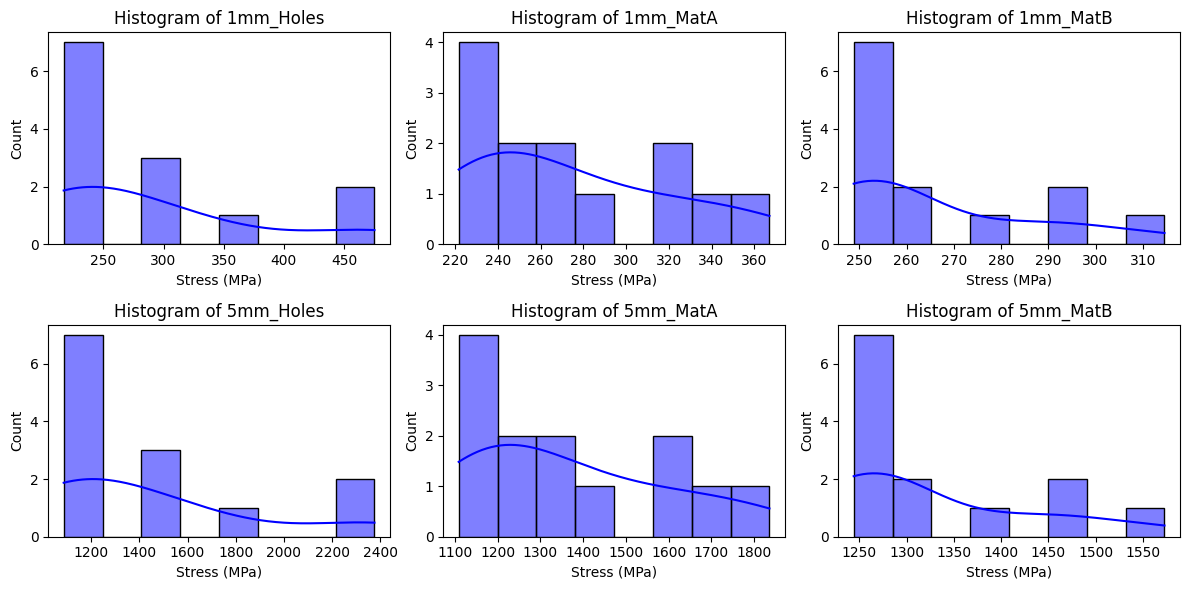

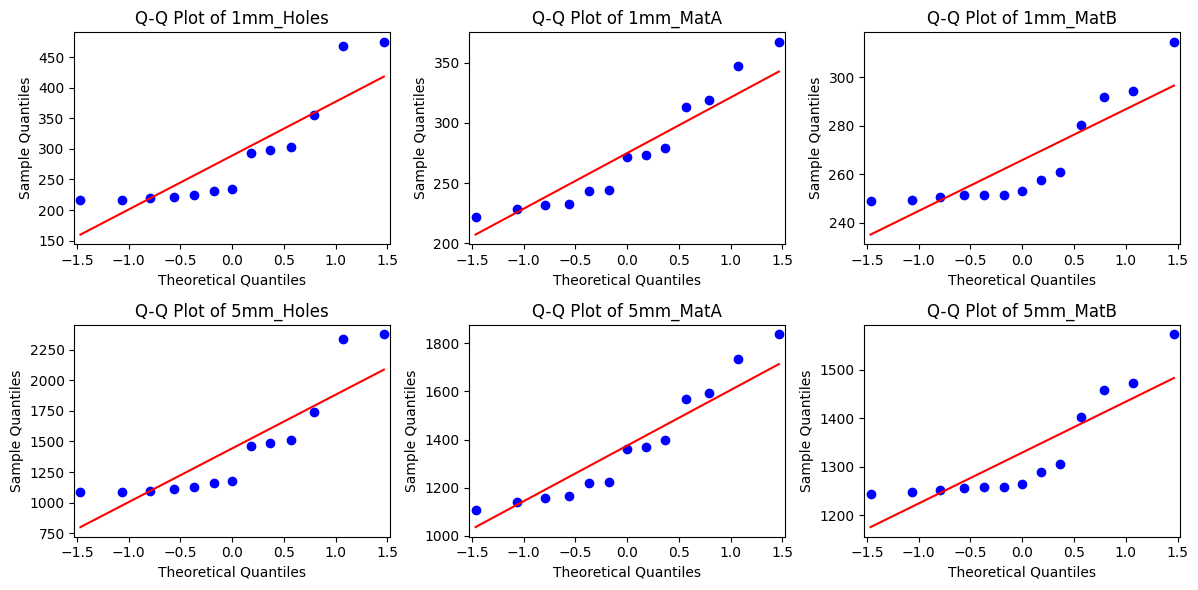

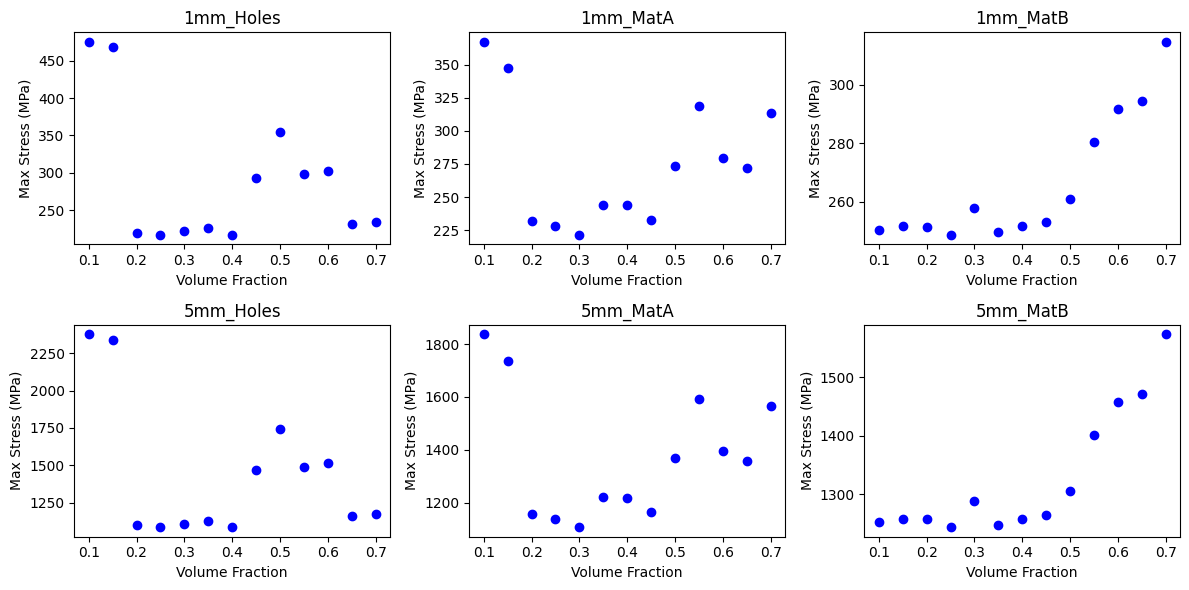

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def main():

    data_dict = {
        'Volume_Fraction': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7],
        '1mm_Holes':       [475.2,468, 219.4, 217.2, 222, 225.3, 217.1, 293.1, 354.8, 298.1, 302.6, 231.4, 234.5],
        '1mm_MatA':        [367.1,347.3,231.8,228.3,221.7,244.3,243.9,233,273.6,318.7,279.3,272.1,313.4],
        '1mm_MatB':        [250.5,251.6,251.4,248.8,257.8,249.6,251.6,253,261.1,280.3,291.7,294.3,314.6],
        '5mm_Holes':       [2376,2340,1097,1086,1110,1126,1086,1466,1744,1490, 1513 ,1157, 1173],
        '5mm_MatA':        [1836,1736,1159,1141,1109,1222,1219,1165,1368,1594,1397,1360,1567],
        '5mm_MatB':        [1252,1258,1257,1244,1289,1248,1258,1265,1306,1402,1458,1472,1573]
    }

    df = pd.DataFrame(data_dict)

    #----------------------------------------------------------------------
    #  BASIC STATISTICS
    #----------------------------------------------------------------------
    print("\nBasic Descriptive Statistics (excluding Volume_Fraction):\n")
    print(df.drop(columns=['Volume_Fraction']).describe())

    # List of columns we want to examine
    stress_cols = ['1mm_Holes','1mm_MatA','1mm_MatB','5mm_Holes','5mm_MatA','5mm_MatB']

    # ---------------------------------------------------------------------
    # CREATE SUBPLOTS FOR HISTOGRAMS
    # ---------------------------------------------------------------------
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))  # 2 x 3 grid
    axs = axs.ravel()  # Flatten to 1D for easy indexing

    for i, col in enumerate(stress_cols):
        sns.histplot(df[col], kde=True, ax=axs[i], bins=8, color='blue')
        axs[i].set_title(f'Histogram of {col}')
        axs[i].set_xlabel('Stress (MPa)')
        axs[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------------------
    # CREATE SUBPLOTS FOR Q–Q PLOTS
    # ---------------------------------------------------------------------
    # Statsmodels' sm.qqplot by default returns a new figure each time,
    # so we will use `ProbPlot` to place them into subplots.
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()

    for i, col in enumerate(stress_cols):
        # Create a ProbPlot object
        qq = sm.ProbPlot(df[col])
        # Plot on the given axis
        qq.qqplot(ax=axs[i], line='s', markerfacecolor='blue', markeredgecolor='blue')
        axs[i].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()


 # ---------------------------------------------------------------------
    # CREATE SCATTER SUBPLOTS
    # ---------------------------------------------------------------------
    stress_cols = ['1mm_Holes','1mm_MatA','1mm_MatB','5mm_Holes','5mm_MatA','5mm_MatB']

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()  # Flatten 2D array of Axes to 1D

    for i, col in enumerate(stress_cols):
        axs[i].scatter(df['Volume_Fraction'], df[col], color='blue', marker='o')
        axs[i].set_title(col)
        axs[i].set_xlabel('Volume Fraction')
        axs[i].set_ylabel('Max Stress (MPa)')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


# Max stress at 1mm and 5mm Displacement (provided data)


Basic Descriptive Statistics (excluding Volume_Fraction):

        1mm_Holes    1mm_MatA    1mm_MatB    5mm_Holes     5mm_MatA  \
count   13.000000   13.000000   13.000000    13.000000    13.000000   
mean   369.478615  328.601615  313.768692  1847.393000  1643.739231   
std    130.687680   65.291243   18.763535   653.440555   326.650390   
min    162.654000  247.325000  291.050000   813.269000  1236.630000   
25%    305.303000  282.480000  299.539000  1526.510000  1412.400000   
50%    359.080000  310.234000  308.474000  1795.400000  1551.170000   
75%    454.594000  387.345000  325.115000  2272.970000  1936.730000   
max    589.650000  458.921000  359.343000  2948.250000  2294.600000   

          5mm_MatB  
count    13.000000  
mean   1566.538462  
std      96.096790  
min    1455.250000  
25%    1497.700000  
50%    1542.370000  
75%    1625.580000  
max    1796.720000  


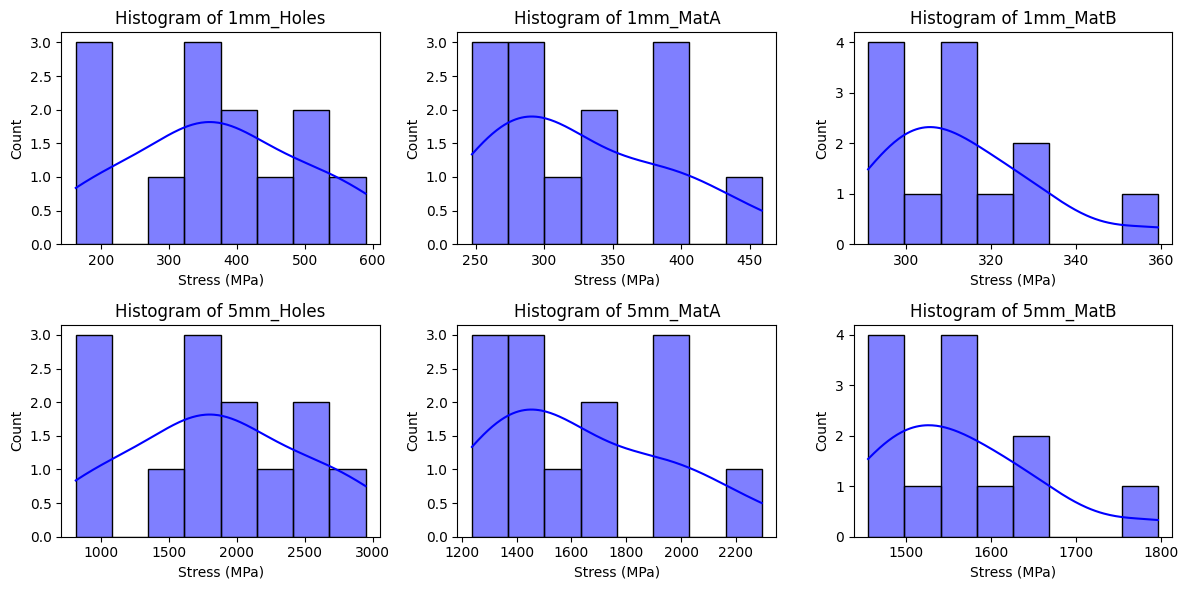

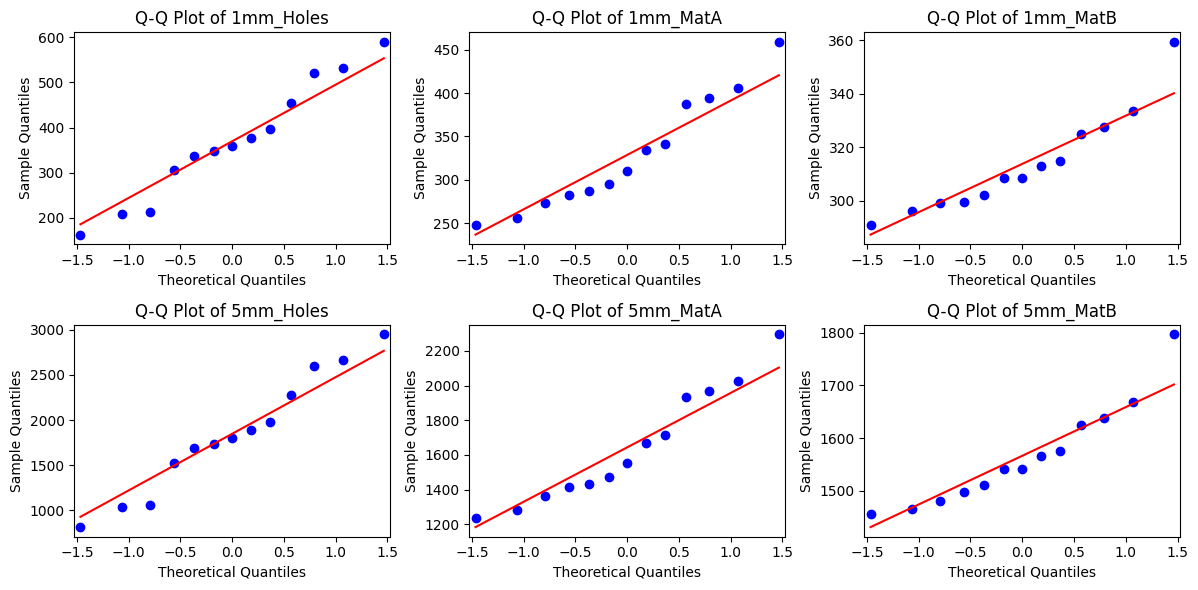

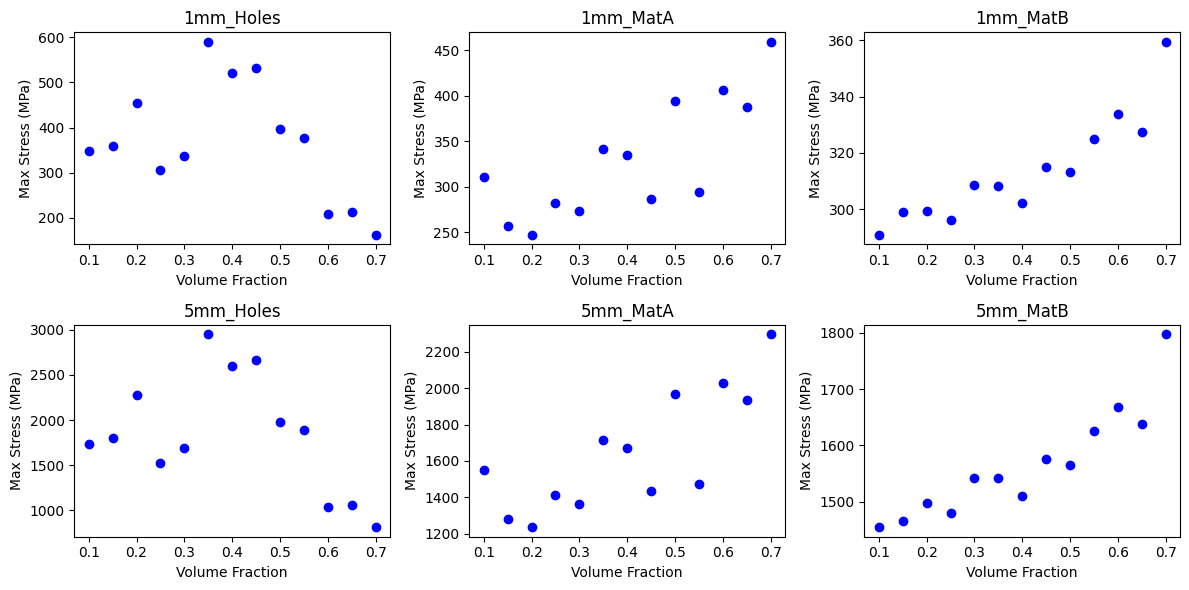

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def main():
    # ---------------------------------------------------------------------
    # 1) LOAD DATA
    # ---------------------------------------------------------------------
    data_dict = {
        'Volume_Fraction': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7],
        '1mm_Holes':       [347.613, 359.08, 454.594, 305.303, 337.884, 589.65, 520.482, 532.067,
                            396.119, 377.361, 208.163, 212.252, 162.654],
        '1mm_MatA':        [310.234, 256.346, 247.325, 282.48, 272.717, 341.193, 334.245, 286.829,
                            394.028, 294.543, 405.615, 387.345, 458.921],
        '1mm_MatB':        [291.05, 299.229, 299.539, 296.22, 308.474, 308.453, 302.148, 315.039,
                            313.111, 325.115, 333.695, 327.577, 359.343],
        '5mm_Holes':       [1738.07, 1795.4, 2272.97, 1526.51, 1689.42, 2948.25, 2602.42, 2660.34,
                            1980.59, 1886.8, 1040.81, 1061.26, 813.269],
        '5mm_MatA':        [1551.17, 1281.73, 1236.63, 1412.4, 1363.58, 1715.97, 1671.22, 1434.15,
                            1970.14, 1472.21, 2028.08, 1936.73, 2294.6],
        '5mm_MatB':        [1455.25, 1466.15, 1497.7, 1481.11, 1542.37, 1542.26, 1510.74, 1575.19,
                            1565.56, 1625.58, 1668.48, 1637.89, 1796.72]
    }

    df = pd.DataFrame(data_dict)

    # List of columns we want to examine
    stress_cols = ['1mm_Holes','1mm_MatA','1mm_MatB','5mm_Holes','5mm_MatA','5mm_MatB']
    print("\nBasic Descriptive Statistics (excluding Volume_Fraction):\n")
    print(df.drop(columns=['Volume_Fraction']).describe())

    # ---------------------------------------------------------------------
    # 2) CREATE SUBPLOTS FOR HISTOGRAMS
    # ---------------------------------------------------------------------
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))  # 2 x 3 grid
    axs = axs.ravel()  # Flatten to 1D for easy indexing

    for i, col in enumerate(stress_cols):
        sns.histplot(df[col], kde=True, ax=axs[i], bins=8, color='blue')
        axs[i].set_title(f'Histogram of {col}')
        axs[i].set_xlabel('Stress (MPa)')
        axs[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------------------
    # 3) CREATE SUBPLOTS FOR Q–Q PLOTS
    # ---------------------------------------------------------------------
    # Statsmodels' sm.qqplot by default returns a new figure each time,
    # so we will use `ProbPlot` to place them into subplots.
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()

    for i, col in enumerate(stress_cols):
        # Create a ProbPlot object
        qq = sm.ProbPlot(df[col])
        # Plot on the given axis
        qq.qqplot(ax=axs[i], line='s', markerfacecolor='blue', markeredgecolor='blue')
        axs[i].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

 # ---------------------------------------------------------------------
    # 2) CREATE SCATTER SUBPLOTS
    # ---------------------------------------------------------------------
    stress_cols = ['1mm_Holes','1mm_MatA','1mm_MatB','5mm_Holes','5mm_MatA','5mm_MatB']

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()  # Flatten 2D array of Axes to 1D

    for i, col in enumerate(stress_cols):
        axs[i].scatter(df['Volume_Fraction'], df[col], color='blue', marker='o')
        axs[i].set_title(col)
        axs[i].set_xlabel('Volume Fraction')
        axs[i].set_ylabel('Max Stress (MPa)')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


# Max Displacements for 100N and 500N Loads (My Data)


BASIC DESCRIPTIVE STATISTICS (excl. Volume_Fraction):

       disp_100N_Holes  disp_100N_MatA  disp_100N_MatB  disp_500N_Holes  \
count        13.000000       13.000000       13.000000        13.000000   
mean         -1.551000       -0.940208       -0.592023        -7.754615   
std           1.013943        0.269903        0.057106         5.068649   
min          -3.861000       -1.500000       -0.645800       -19.300000   
25%          -1.943000       -1.173000       -0.638500        -9.714000   
50%          -1.010000       -0.791500       -0.617700        -5.051000   
75%          -0.845200       -0.740500       -0.552100        -4.226000   
max          -0.744100       -0.701400       -0.483000        -3.721000   

       disp_500N_MatA  disp_500N_MatB  
count       13.000000       13.000000  
mean        -4.702308       -2.957692  
std          1.348203        0.284552  
min         -7.499000       -3.229000  
25%         -5.867000       -3.192000  
50%         -3.958000       

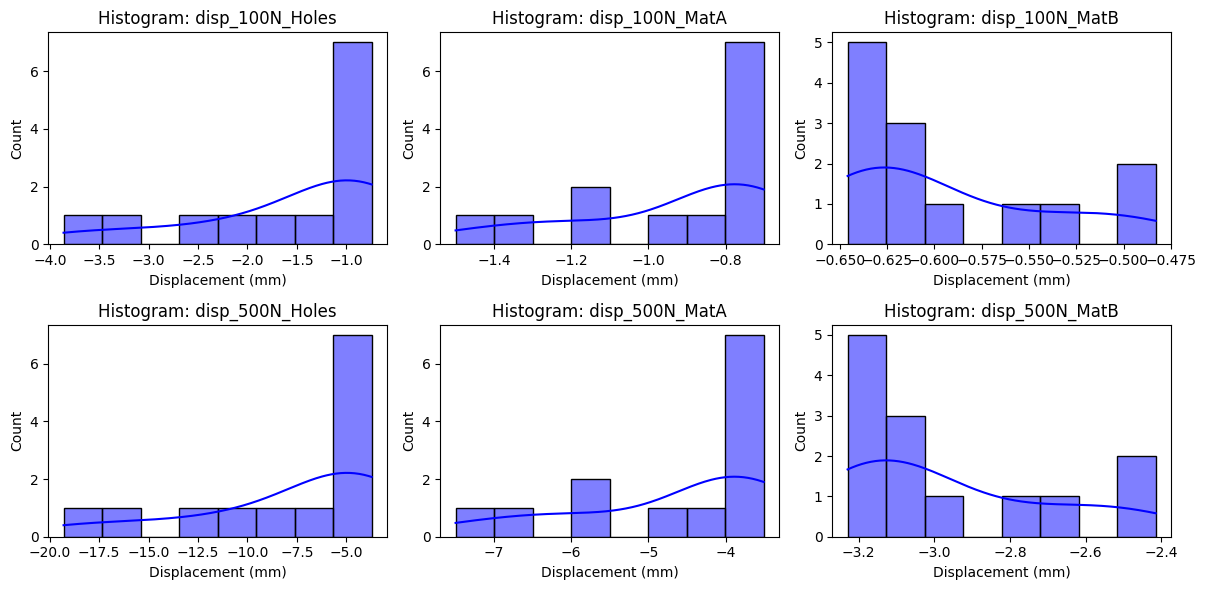

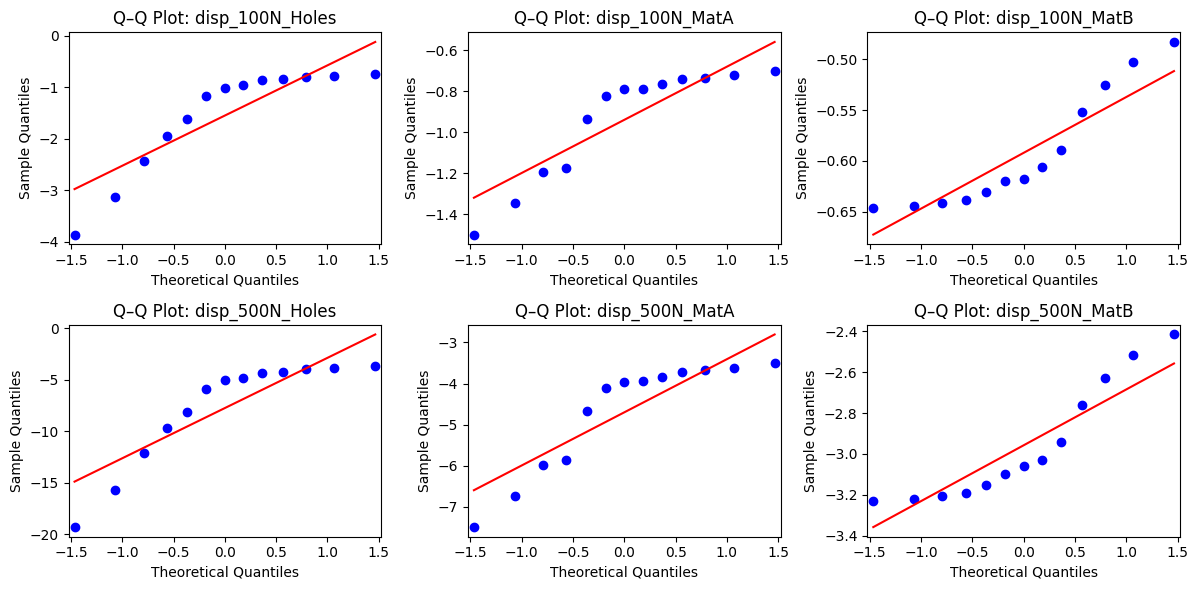

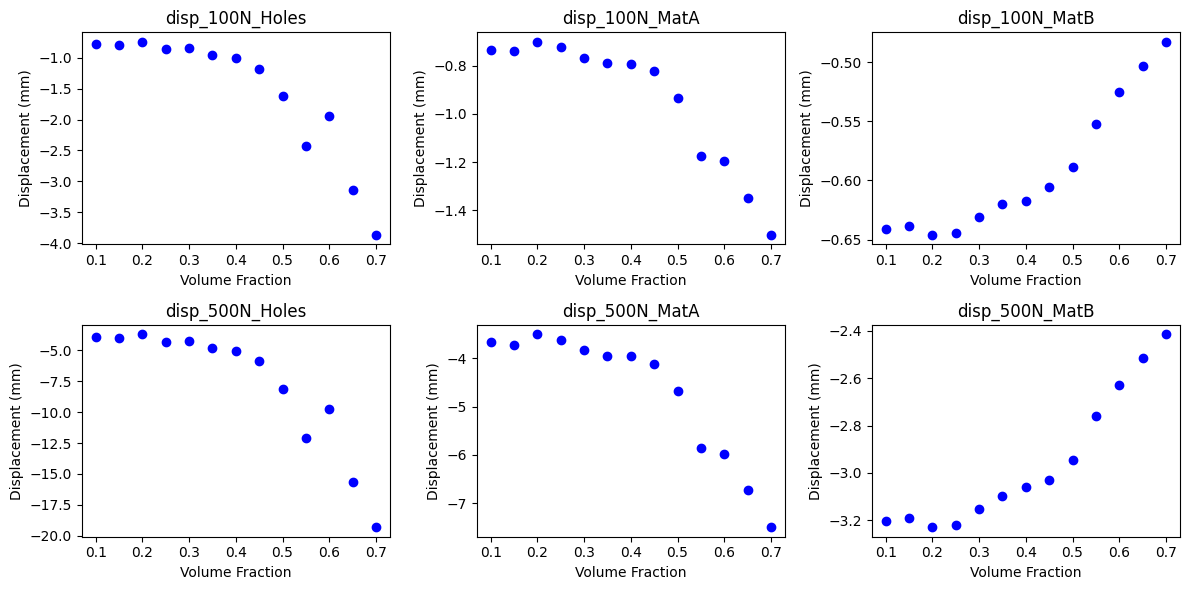

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def main():
    # ---------------------------------------------------------------------
    # LOAD YOUR DISPLACEMENT DATA
    #
    # ---------------------------------------------------------------------
    data_dict = {
        'Volume_Fraction': [
            0.1, 0.15, 0.2, 0.25, 0.3,
            0.35, 0.4, 0.45, 0.5, 0.55,
            0.6, 0.65, 0.7
        ],
        # Displacement at 100 N end load
        'disp_100N_Holes': [
            -0.7816, -0.7948, -0.7441, -0.8619, -0.8452,
            -0.9624, -1.0100, -1.1760, -1.6230, -2.4240,
            -1.9430, -3.1360, -3.8610
        ],
        'disp_100N_MatA': [
            -0.7341, -0.7405, -0.7014, -0.7235, -0.7670,
            -0.7894, -0.7915, -0.8234, -0.9349, -1.1730,
            -1.1960, -1.3480, -1.5000
        ],
        'disp_100N_MatB': [
            -0.6410, -0.6385, -0.6458, -0.6443, -0.6308,
            -0.6198, -0.6177, -0.6059, -0.5888, -0.5521,  # <-- placeholders
            -0.5255, -0.5031, -0.4830
        ],
        # Displacement at 500 N end load
        'disp_500N_Holes': [
            -3.908, -3.974, -3.721, -4.309, -4.226,
            -4.812, -5.051, -5.881, -8.114, -12.12,
            -9.714, -15.68, -19.30
        ],
        'disp_500N_MatA': [
            -3.670, -3.720, -3.507, -3.617, -3.835,
            -3.947, -3.958, -4.117, -4.675, -5.867,
            -5.980, -6.738, -7.499
        ],
        'disp_500N_MatB': [
            -3.205, -3.192, -3.229, -3.222, -3.154,
            -3.099, -3.058, -3.029, -2.944, -2.760,
            -2.628, -2.515, -2.415
        ]
    }

    # Create a DataFrame
    df = pd.DataFrame(data_dict)

    # ---------------------------------------------------------------------
    #  PRINT BASIC DESCRIPTIVE STATISTICS
    # ---------------------------------------------------------------------
    print("\nBASIC DESCRIPTIVE STATISTICS (excl. Volume_Fraction):\n")
    # Drop Volume_Fraction column before describing
    print(df.drop(columns=['Volume_Fraction']).describe())

    # ---------------------------------------------------------------------
    #  SUBPLOTS FOR HISTOGRAMS (2 rows × 3 columns)
    # ---------------------------------------------------------------------
    disp_cols = [
        'disp_100N_Holes', 'disp_100N_MatA', 'disp_100N_MatB',
        'disp_500N_Holes', 'disp_500N_MatA', 'disp_500N_MatB'
    ]
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()  # Flatten into 1D array of Axes

    for i, col in enumerate(disp_cols):
        sns.histplot(df[col], kde=True, ax=axs[i], bins=8, color='blue')
        axs[i].set_title(f'Histogram: {col}')
        axs[i].set_xlabel('Displacement (mm)')
        axs[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------------------
    #  SUBPLOTS FOR Q–Q PLOTS (2 rows × 3 columns)
    # ---------------------------------------------------------------------
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()

    for i, col in enumerate(disp_cols):
        qq = sm.ProbPlot(df[col])
        qq.qqplot(ax=axs[i], line='s', markerfacecolor='blue', markeredgecolor='blue')
        axs[i].set_title(f'Q–Q Plot: {col}')

    plt.tight_layout()
    plt.show()
# ---------------------------------------------------------------------
    #  SCATTER PLOTS IN A 2×3 GRID
    # ---------------------------------------------------------------------
    disp_cols = [
        'disp_100N_Holes', 'disp_100N_MatA', 'disp_100N_MatB',
        'disp_500N_Holes', 'disp_500N_MatA', 'disp_500N_MatB'
    ]

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()  # Flatten to a 1D array

    for i, col in enumerate(disp_cols):
        axs[i].scatter(df['Volume_Fraction'], df[col], color='blue', marker='o')
        axs[i].set_title(col)
        axs[i].set_xlabel('Volume Fraction')
        axs[i].set_ylabel('Displacement (mm)')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


# Max Displacements for 100N and 500N Loads (Provided Data)


BASIC DESCRIPTIVE STATISTICS (excluding Volume_Fraction):

       disp_100N_Holes  disp_100N_MatA  disp_100N_MatB  disp_500N_Holes  \
count        13.000000       13.000000       13.000000        13.000000   
mean        -20.962911       -1.024953       -0.571464      -104.818777   
std          63.929807        0.285456        0.051473       319.647622   
min        -233.186000       -1.553240       -0.637440     -1165.930000   
25%          -2.725600       -1.190470       -0.614885       -13.628000   
50%          -1.419120       -0.966630       -0.577702        -7.095610   
75%          -0.855521       -0.774226       -0.535038        -4.277610   
max          -0.738961       -0.723759       -0.474383        -3.694800   

       disp_500N_MatA  disp_500N_MatB  
count       13.000000       13.000000  
mean        -5.107585       -2.856284  
std          1.400161        0.262043  
min         -7.766220       -3.187200  
25%         -5.952350       -3.074420  
50%         -4.831500   

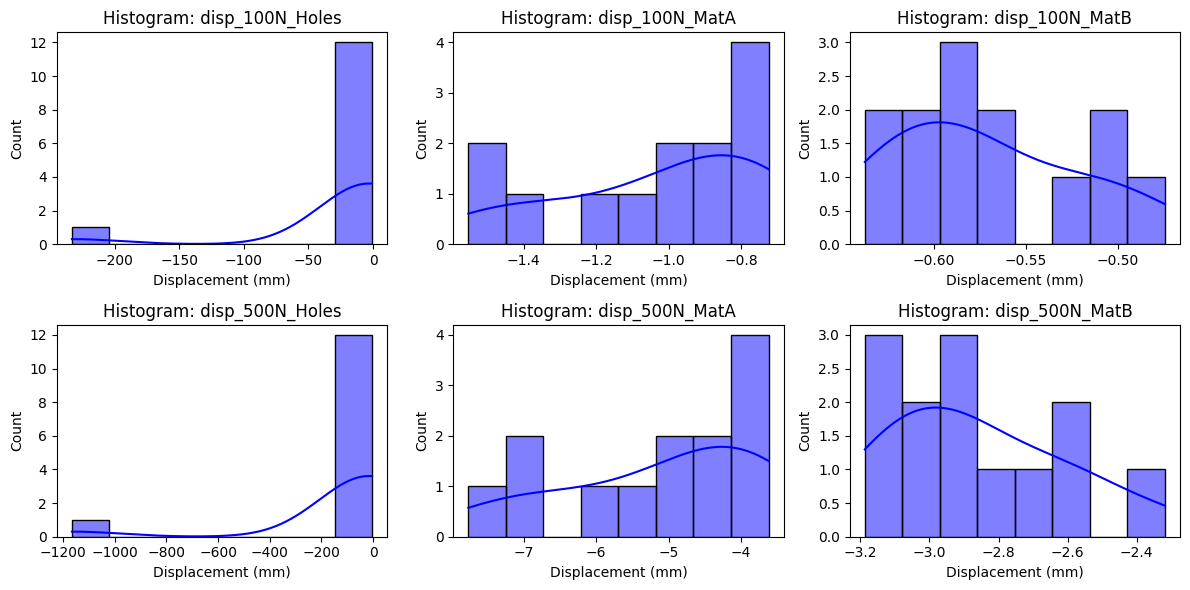

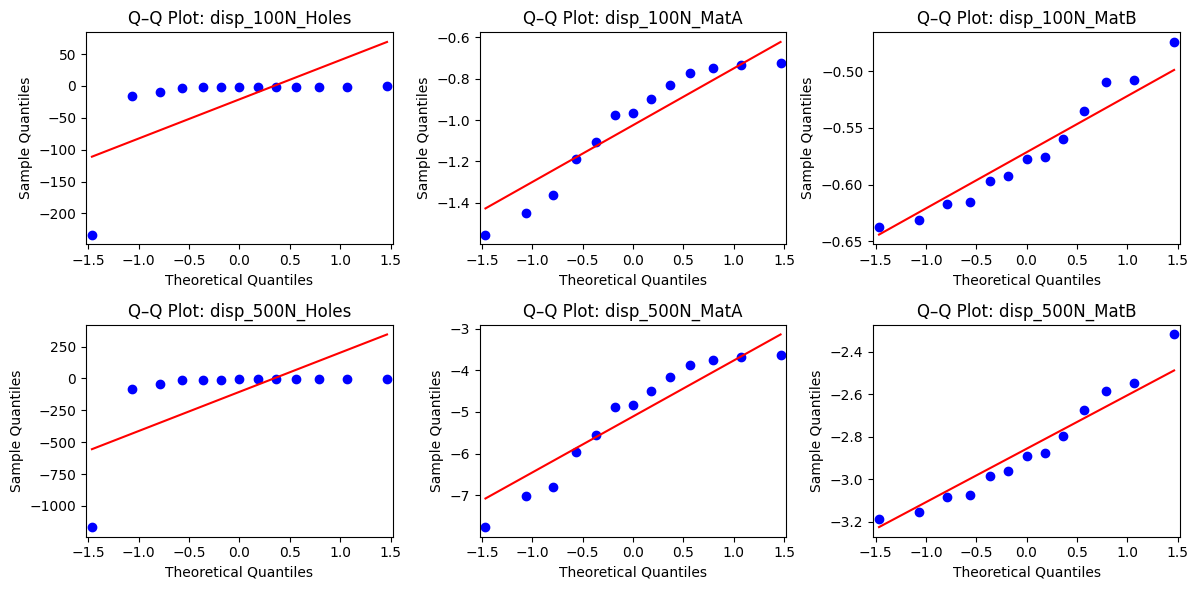

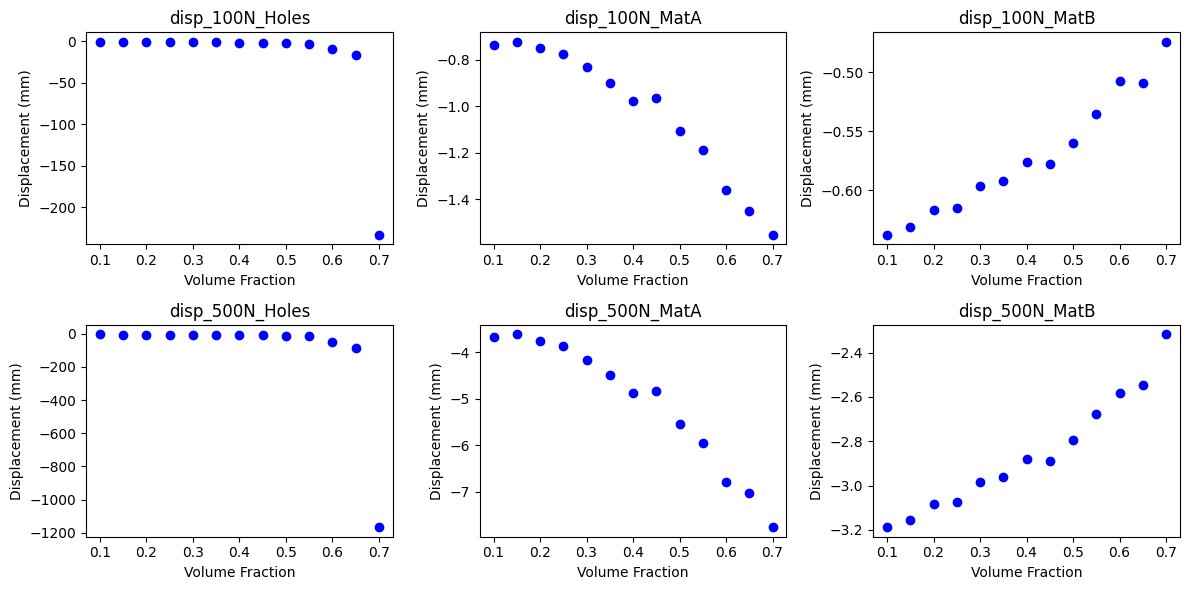

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def main():
    # ---------------------------------------------------------------------
    #  LOAD THE DATA T
    # ---------------------------------------------------------------------
    data_dict = {
        'Volume_Fraction': [
            0.1, 0.15, 0.2, 0.25, 0.3,
            0.35, 0.4, 0.45, 0.5, 0.55,
            0.6, 0.65, 0.7
        ],
        # Displacement at 100 N end load
        'disp_100N_Holes': [
            -0.738961, -0.855521, -0.848818, -0.85245, -0.985932,
            -1.24567, -1.41912, -1.6689, -2.15893, -2.7256,
            -9.34404, -16.4879, -233.186
        ],
        'disp_100N_MatA': [
            -0.735191, -0.723759, -0.750971, -0.774226, -0.833196,
            -0.899816, -0.977682, -0.96663, -1.10828, -1.19047,
            -1.35998, -1.45095, -1.55324
        ],
        'disp_100N_MatB': [
            -0.63744, -0.63121, -0.61675, -0.614885, -0.596528,
            -0.592495, -0.575703, -0.577702, -0.559818, -0.535038,
            -0.507666, -0.509413, -0.474383
        ],
        # Displacement at 500 N end load
        'disp_500N_Holes': [
            -3.6948, -4.27761, -4.24409, -4.26225, -4.92966,
            -6.28336, -7.09561, -8.34452, -10.7947, -13.628,
            -46.7202, -82.4393, -1165.93
        ],
        'disp_500N_MatA': [
            -3.6795, -3.61879, -3.75458, -3.87113, -4.16598,
            -4.49908, -4.88841, -4.8315, -5.54139, -5.95235,
            -6.7999, -7.02977, -7.76622
        ],
        'disp_500N_MatB': [
            -3.1872, -3.15605, -3.08375, -3.07442, -2.98264,
            -2.96247, -2.87851, -2.88851, -2.79459, -2.67519,
            -2.58338, -2.54706, -2.31792
        ]
    }

    # Convert to a DataFrame
    df = pd.DataFrame(data_dict)

    # ---------------------------------------------------------------------
    # PRINT BASIC DESCRIPTIVE STATISTICS
    # ---------------------------------------------------------------------
    print("\nBASIC DESCRIPTIVE STATISTICS (excluding Volume_Fraction):\n")
    print(df.drop(columns=['Volume_Fraction']).describe())

    # ---------------------------------------------------------------------
    #  HISTOGRAMS IN A 2×3 SUBPLOT
    # ---------------------------------------------------------------------
    disp_cols = [
        'disp_100N_Holes', 'disp_100N_MatA', 'disp_100N_MatB',
        'disp_500N_Holes', 'disp_500N_MatA', 'disp_500N_MatB'
    ]

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()

    for i, col in enumerate(disp_cols):
        sns.histplot(df[col], kde=True, ax=axs[i], bins=8, color='blue')
        axs[i].set_title(f'Histogram: {col}')
        axs[i].set_xlabel('Displacement (mm)')
        axs[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------------------
    #  Q–Q PLOTS IN A 2×3 SUBPLOT
    # ---------------------------------------------------------------------
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()

    for i, col in enumerate(disp_cols):
        qq = sm.ProbPlot(df[col])
        qq.qqplot(ax=axs[i], line='s', markerfacecolor='blue', markeredgecolor='blue')
        axs[i].set_title(f'Q–Q Plot: {col}')

    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
    #  SCATTER PLOTS IN A 2×3 GRID
    # ---------------------------------------------------------------------
    disp_cols = [
        'disp_100N_Holes', 'disp_100N_MatA', 'disp_100N_MatB',
        'disp_500N_Holes', 'disp_500N_MatA', 'disp_500N_MatB'
    ]

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
    axs = axs.ravel()  # Flatten to a 1D array

    for i, col in enumerate(disp_cols):
        axs[i].scatter(df['Volume_Fraction'], df[col], color='blue', marker='o')
        axs[i].set_title(col)
        axs[i].set_xlabel('Volume Fraction')
        axs[i].set_ylabel('Displacement (mm)')

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    main()
